In [1]:
import os
import time
import numpy as np
import pandas as pd
from radar.dataparsing.td_textdata_parser import read_columns
from scipy.fftpack import fft
from matplotlib import pyplot as plt

td_data = []
runNumber = 7
directory_to_process = f"data/radar/run{runNumber}-TD"
# directory_to_process = f"output/2024-09-29_20-20-41/radar"

def process_data_from_folder(self):
        
        # List all files in the directory
        files = os.listdir(directory_to_process)
        
        # Filter the files based on the naming convention
        txt_files = [f for f in files if f.startswith(('trial', 'TD')) and f.endswith('.txt')]
        
        # Sort the files if needed (optional)
        txt_files.sort()
        
        # Process each file one by one
        for file_name in txt_files:
            file_path = os.path.join(directory_to_process, file_name)
            # print(f"Processing file: {file_path}")
            new_fd_data = read_columns(file_path)
            td_data.append(new_fd_data.td_data)
            
process_data_from_folder(directory_to_process)
td_data = np.array(td_data)
I1_data = td_data[:, :, 0]  # Extract the I1 signal, which is the first column across all frames and range bins
Q1_data = td_data[:, :, 1]  # Extract the Q1 signal, which is the second column across all frames and range bins
I2_data = td_data[:, :, 2]  # Extract the I2 signal, which is the third column across all frames and range bins
Q2_data = td_data[:, :, 3]  # Extract the IQ2 signal, which is the fourth column across all frames and range bins
Complex_data1 = I1_data + 1j * Q1_data

## Populate all the radar variables required:
TIME_STEP = 0.241
WAVELENGTH = 0.01233714
C = 299792458  # Speed of light (m/s)

f_0 = 24e9  # Center Frequency (Hz)
f_c = 24.500e9  # Center Frequency (Hz)
f_chirp = 1e3  # Chirp Sequence Frequency (Hz)
f_r = 750e6  # Ramp Frequency (Hz)
T_r = 1 / f_chirp  # Duration of one cycle (s)
m_w = f_r / T_r  # Slope of the ramp (Hz/s)
n_r = I1_data.shape[0] # number of total chirps - assumes all have the same shape, which they should
n_s = I1_data.shape[1] # number of samples - assumes all have the same shape, which they should
T_M = T_r * n_r  # Total measurement time (s)
f_s = 1 / TIME_STEP

SINGLE_TO_PROCESS = Complex_data1

print(f"Num samples: {td_data.shape[0]}")

Num samples: 2302


### Visualize the Chirp Sequence

Text(0.5, 1.0, 'Chirp sequence Modulation, transmitted signal $f_t(t)$')

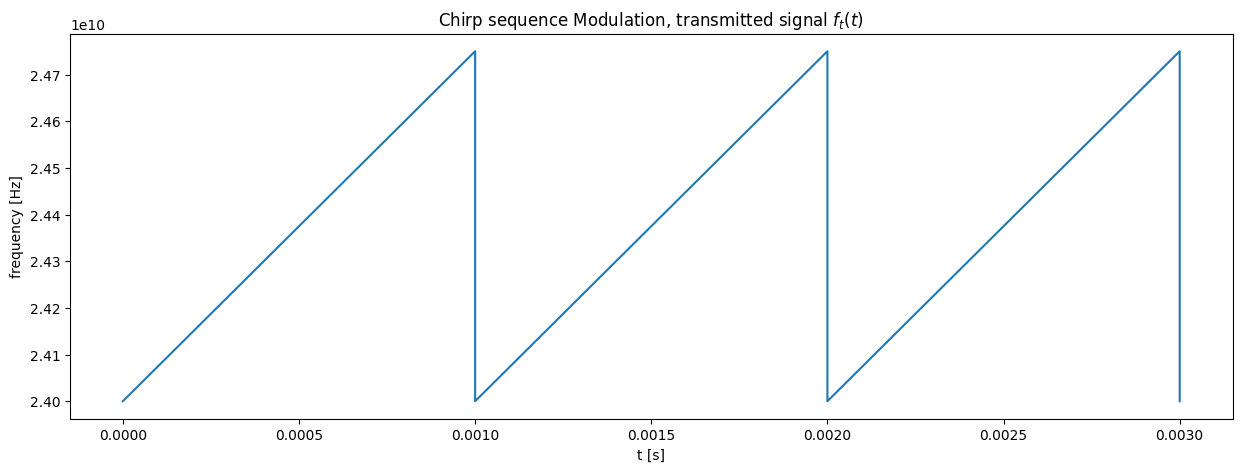

In [2]:
def f_transmitted(t):
    return f_0 + m_w*(t%T_r)

def chirp(t):
    return np.cos(2*np.pi*(f_transmitted(t))*t)

t = np.linspace(0, 3*T_r, int(1e6))

plt.figure(figsize=(15,5))
plt.plot(t, f_transmitted(t))
plt.xlabel("t [s]")
plt.ylabel("frequency [Hz]")
plt.title("Chirp sequence Modulation, transmitted signal $f_t(t)$")

### Show Data in Frame

In [3]:
# Plot the signals

import matplotlib.pyplot as plt
import numpy as np

def plot_I1_Q1(td_data, sample_index=0):
    """
    Plots the I1 and Q1 signal's voltage for the specified sample index.
    
    Parameters:
    td_data (np.array): 3D numpy array of shape (224, 1024, 4)
                        where the last dimension represents [I1, Q1, I2, Q2] signals.
    sample_index (int): The index of the sample to plot.
    
    Returns:
    None
    """
    # Extracting I1 and Q1 signals
    I1 = td_data[sample_index, :, 0]  # I1 signal
    Q1 = td_data[sample_index, :, 1]  # Q1 signal
    
    # Create a time array based on the number of samples (1024)
    time_array = np.linspace(0, len(I1), len(I1))
    
    # Plot the I1 signal
    plt.figure(figsize=(10, 6))
    
    plt.subplot(2, 1, 1)
    plt.plot(time_array, I1, label="I1 Signal", color="blue")
    plt.title(f"I1 Signal for Sample {sample_index}")
    plt.xlabel("Time (arbitrary units)")
    plt.ylabel("Voltage (V)")
    plt.grid(True)
    
    # Plot the Q1 signal
    plt.subplot(2, 1, 2)
    plt.plot(time_array, Q1, label="Q1 Signal", color="green")
    plt.title(f"Q1 Signal for Sample {sample_index}")
    plt.xlabel("Time (arbitrary units)")
    plt.ylabel("Voltage (V)")
    plt.grid(True)
    
    # Display the plots
    plt.tight_layout()
    plt.show()

In [4]:
# Assuming I1_data is a 2D array or list with 224 rows and 1024 columns
# For demonstration, let's create a random DataFrame with the specified shape
print(f"Signal Processing shape: {SINGLE_TO_PROCESS.shape}")

# Create a DataFrame for the I1 signal
df_I1_signal = pd.DataFrame(SINGLE_TO_PROCESS,
                            index=["Chirp_%03d"%i for i in range(n_r)],
                            columns=["Sample_%03d"%i for i in range(n_s)])

# Display the first 10 rows of the DataFrame
df_I1_signal.head(10)

Signal Processing shape: (2302, 1024)


,Sample_000,Sample_001,Sample_002,Sample_003,Sample_004,Sample_005,Sample_006,Sample_007,Sample_008,Sample_009,...,Sample_1014,Sample_1015,Sample_1016,Sample_1017,Sample_1018,Sample_1019,Sample_1020,Sample_1021,Sample_1022,Sample_1023
Chirp_000,1.3184+1.6948j,1.3242+1.6994j,1.3336+1.7003j,1.3407+1.6990j,1.3438+1.6968j,1.3442+1.6956j,1.3436+1.6950j,1.3444+1.6952j,1.3462+1.6959j,1.3488+1.6974j,...,1.2821+1.5793j,1.2845+1.5789j,1.2854+1.5787j,1.2847+1.5787j,1.2841+1.5795j,1.2834+1.5815j,1.2823+1.5840j,1.2827+1.5859j,1.2839+1.5870j,1.2863+1.5877j
Chirp_001,1.3220+1.6884j,1.3240+1.6932j,1.3293+1.6954j,1.3356+1.6965j,1.3401+1.6961j,1.3434+1.6948j,1.3453+1.6957j,1.3462+1.6972j,1.3471+1.6998j,1.3488+1.7000j,...,1.2790+1.5795j,1.2816+1.5807j,1.2856+1.5811j,1.2885+1.5815j,1.2885+1.5818j,1.2872+1.5831j,1.2861+1.5851j,1.2852+1.5866j,1.2854+1.5883j,1.2869+1.5892j
Chirp_002,1.3231+1.6891j,1.3259+1.6932j,1.3304+1.6948j,1.3334+1.6970j,1.3361+1.6998j,1.3387+1.7023j,1.3422+1.7038j,1.3466+1.7025j,1.3499+1.6998j,1.3524+1.6968j,...,1.2836+1.5789j,1.2852+1.5789j,1.2859+1.5802j,1.2859+1.5817j,1.2856+1.5839j,1.2865+1.5857j,1.2881+1.5868j,1.2902+1.5870j,1.2911+1.5853j,1.2918+1.5840j
Chirp_003,1.3288+1.6875j,1.3319+1.6902j,1.3336+1.6917j,1.3341+1.6921j,1.3352+1.6930j,1.3365+1.6939j,1.3396+1.6943j,1.3420+1.6941j,1.3429+1.6952j,1.3431+1.6968j,...,1.2808+1.5782j,1.2805+1.5784j,1.2805+1.5789j,1.2799+1.5815j,1.2797+1.5844j,1.2801+1.5872j,1.2808+1.5886j,1.2823+1.5897j,1.2836+1.5895j,1.2850+1.5897j
Chirp_004,1.3218+1.6921j,1.3235+1.6965j,1.3282+1.6989j,1.3334+1.7001j,1.3385+1.7001j,1.3416+1.6994j,1.3453+1.6979j,1.3484+1.6957j,1.3500+1.6950j,1.3499+1.6946j,...,1.2841+1.5773j,1.2827+1.5778j,1.2810+1.5795j,1.2792+1.5813j,1.2799+1.5839j,1.2821+1.5857j,1.2845+1.5866j,1.2870+1.5872j,1.2889+1.5881j,1.2898+1.5886j
Chirp_005,1.3182+1.6899j,1.3220+1.6948j,1.3277+1.6967j,1.3345+1.6974j,1.3398+1.6972j,1.3416+1.6976j,1.3416+1.6974j,1.3407+1.6965j,1.3407+1.6948j,1.3418+1.6946j,...,1.2786+1.5764j,1.2786+1.5786j,1.2768+1.5815j,1.2757+1.5851j,1.2777+1.5870j,1.2808+1.5890j,1.2832+1.5890j,1.2854+1.5884j,1.2881+1.5875j,1.2898+1.5862j
Chirp_006,1.3271+1.6901j,1.3290+1.6943j,1.3328+1.6961j,1.3370+1.6963j,1.3409+1.6954j,1.3418+1.6965j,1.3414+1.6987j,1.3418+1.7009j,1.3442+1.7032j,1.3466+1.7040j,...,1.2902+1.5828j,1.2907+1.5828j,1.2907+1.5828j,1.2911+1.5829j,1.2902+1.5840j,1.2891+1.5862j,1.2880+1.5875j,1.2891+1.5873j,1.2900+1.5873j,1.2903+1.5888j
Chirp_007,1.3233+1.6908j,1.3288+1.6941j,1.3347+1.6935j,1.3378+1.6924j,1.3398+1.6910j,1.3398+1.6919j,1.3387+1.6950j,1.3391+1.6992j,1.3414+1.7014j,1.3455+1.7018j,...,1.2810+1.5786j,1.2816+1.5791j,1.2819+1.5806j,1.2817+1.5824j,1.2823+1.5846j,1.2843+1.5861j,1.2878+1.5866j,1.2902+1.5875j,1.2887+1.5877j,1.2867+1.5888j
Chirp_008,1.3248+1.6827j,1.3235+1.6882j,1.3229+1.6928j,1.3239+1.6963j,1.3270+1.6992j,1.3310+1.7003j,1.3348+1.7005j,1.3389+1.7000j,1.3425+1.7000j,1.3466+1.6994j,...,1.2839+1.5798j,1.2836+1.5800j,1.2816+1.5807j,1.2806+1.5824j,1.2812+1.5842j,1.2827+1.5864j,1.2845+1.5888j,1.2867+1.5894j,1.2885+1.5901j,1.2900+1.5912j
Chirp_009,1.3323+1.6873j,1.3332+1.6924j,1.3352+1.6956j,1.3374+1.6972j,1.3389+1.6983j,1.3403+1.6987j,1.3438+1.6989j,1.3473+1.6996j,1.3504+1.7000j,1.3530+1.7007j,...,1.2803+1.5795j,1.2819+1.5813j,1.2823+1.5840j,1.2830+1.5866j,1.2847+1.5877j,1.2878+1.5873j,1.2900+1.5877j,1.2913+1.5883j,1.2907+1.5883j,1.2903+1.5875j


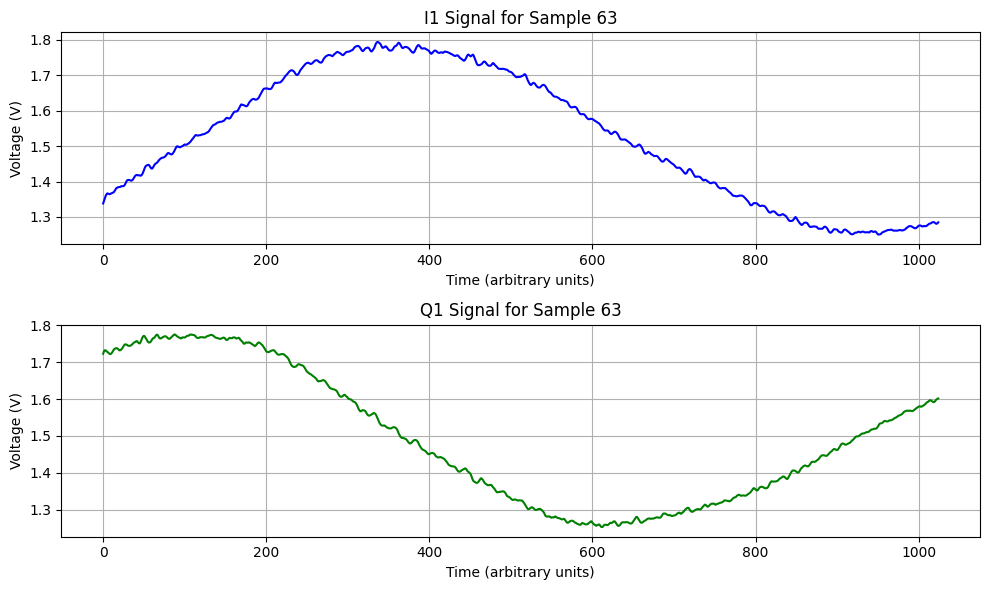

In [5]:
plot_I1_Q1(td_data, sample_index=63) # are up to 0-223 samples for FD6

### FTT Over the First Chirp - I1

In [6]:
ramp_time_ms = 1  # Ramp time in milliseconds
f_s = n_s / (ramp_time_ms * 1e-3) # Sampling frequency, number of samples per second! 

sample_n = 50
chirpn_samples = df_I1_signal.iloc[sample_n].values
chirpn_magnitude = fft(chirpn_samples)
frequencies = np.arange(0, n_s//2)*f_s/n_s

frequencies[:10]


array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.,
       9000.])

In [7]:
def freq_to_range(f):
    return f * C / ( 2 * m_w)

# f_star1 = 2 * m_w / C * 100
# f_star2 = 2 * f_0 / C * 33
# print(f_star1, f_star2)
# print(f_star2/f_star1*100, "%")

ranges = freq_to_range(frequencies)
print(ranges[:10])

[0.         0.19986164 0.39972328 0.59958492 0.79944655 0.99930819
 1.19916983 1.39903147 1.59889311 1.79875475]


0.0


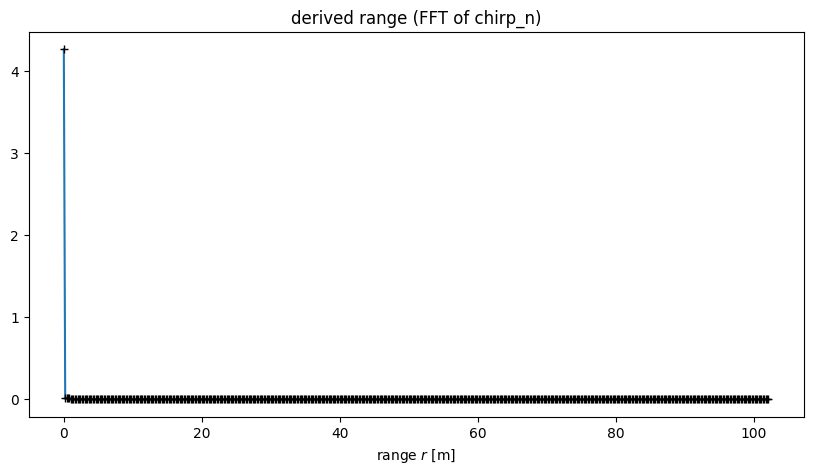

In [8]:
plt.figure(figsize=(10,5))
plt.plot(ranges, 2.0/n_s*np.abs(chirpn_magnitude[0:n_s//2]))
plt.plot(ranges, 2.0/n_s*np.abs(chirpn_magnitude[0:n_s//2]), "k+")
plt.xlabel("range $r$ [m]")
plt.title("derived range (FFT of chirp_n)")
print(freq_to_range(frequencies)[np.argmax(2.0/n_s*np.abs(chirpn_magnitude[0:n_s//2]))])

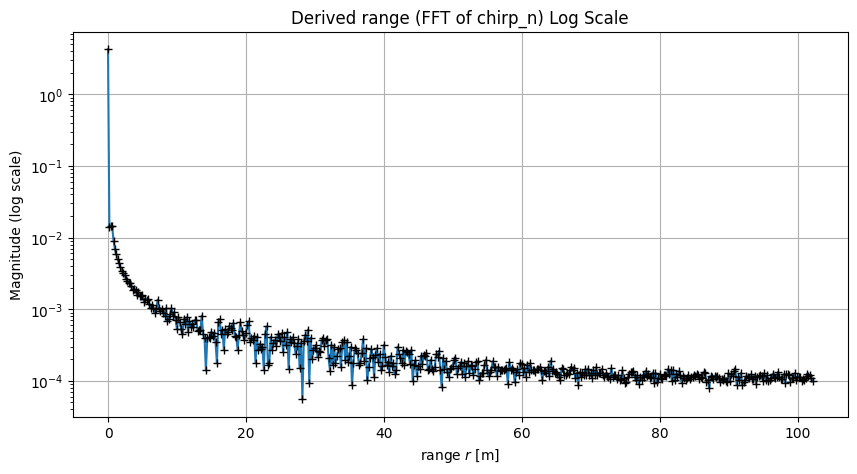

0.0


In [9]:
plt.figure(figsize=(10, 5))

# Plot the FFT magnitude
plt.plot(ranges, 2.0/n_s * np.abs(chirpn_magnitude[0:n_s//2]), label='FFT Magnitude')
plt.plot(ranges, 2.0/n_s * np.abs(chirpn_magnitude[0:n_s//2]), "k+")

# Use a logarithmic scale for the y-axis to handle large differences in magnitude
plt.yscale('log')

# Set labels and title
plt.xlabel("range $r$ [m]")
plt.ylabel("Magnitude (log scale)")
plt.title("Derived range (FFT of chirp_n) Log Scale")

# Optional: grid for better visualization
plt.grid(True)

# Display the plot
plt.show()

# Print the range corresponding to the maximum FFT value
print(freq_to_range(frequencies)[np.argmax(2.0/n_s * np.abs(chirpn_magnitude[0:n_s//2]))])



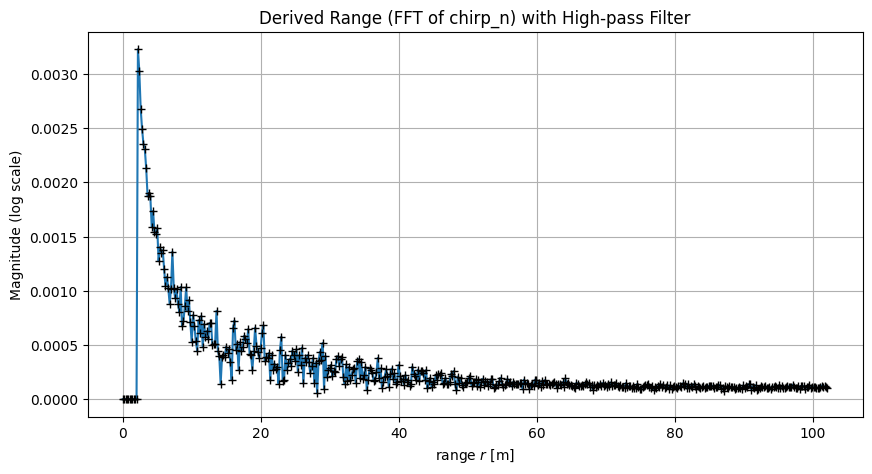

2.1984780253333334


In [10]:
cutoff_frequency = 0.01  # Choose a cutoff frequency to remove lower frequency values (close ranges)

# Create a high-pass filter: set all frequencies below the cutoff to zero
frequencies_filter = np.fft.fftfreq(n_s)  # Generate the frequency axis
high_pass_filter = np.abs(frequencies_filter) >= cutoff_frequency

# Apply the high-pass filter by multiplying it with the FFT output
filtered_magnitude = chirpn_magnitude * high_pass_filter

# Plot the filtered FFT magnitude
plt.figure(figsize=(10, 5))
plt.plot(ranges, 2.0/n_s * np.abs(filtered_magnitude[0:n_s//2]), label='Filtered FFT Magnitude')
plt.plot(ranges, 2.0/n_s * np.abs(filtered_magnitude[0:n_s//2]), "k+")

# Use a logarithmic scale for the y-axis to better visualize small values
# plt.yscale('log')

# Set labels and title
plt.xlabel("range $r$ [m]")
plt.ylabel("Magnitude (log scale)")
plt.title("Derived Range (FFT of chirp_n) with High-pass Filter")

# Optional: grid for better visualization
plt.grid(True)

# Display the plot
plt.show()

# Print the range corresponding to the maximum value of the filtered FFT
print(freq_to_range(frequencies)[np.argmax(2.0/n_s * np.abs(filtered_magnitude[0:n_s//2]))])


## Calcualte range bins for each chirp

In [11]:
range_table = np.zeros((n_r, n_s//2), dtype=np.csingle)

In [12]:
for chirp_nr in range(n_r):
    chirp_ad_values = df_I1_signal.iloc[chirp_nr].values
    chirp_fft = fft(chirp_ad_values) # FFT
    
    range_table[chirp_nr, :] = 2.0/n_s*chirp_fft[:n_s//2]

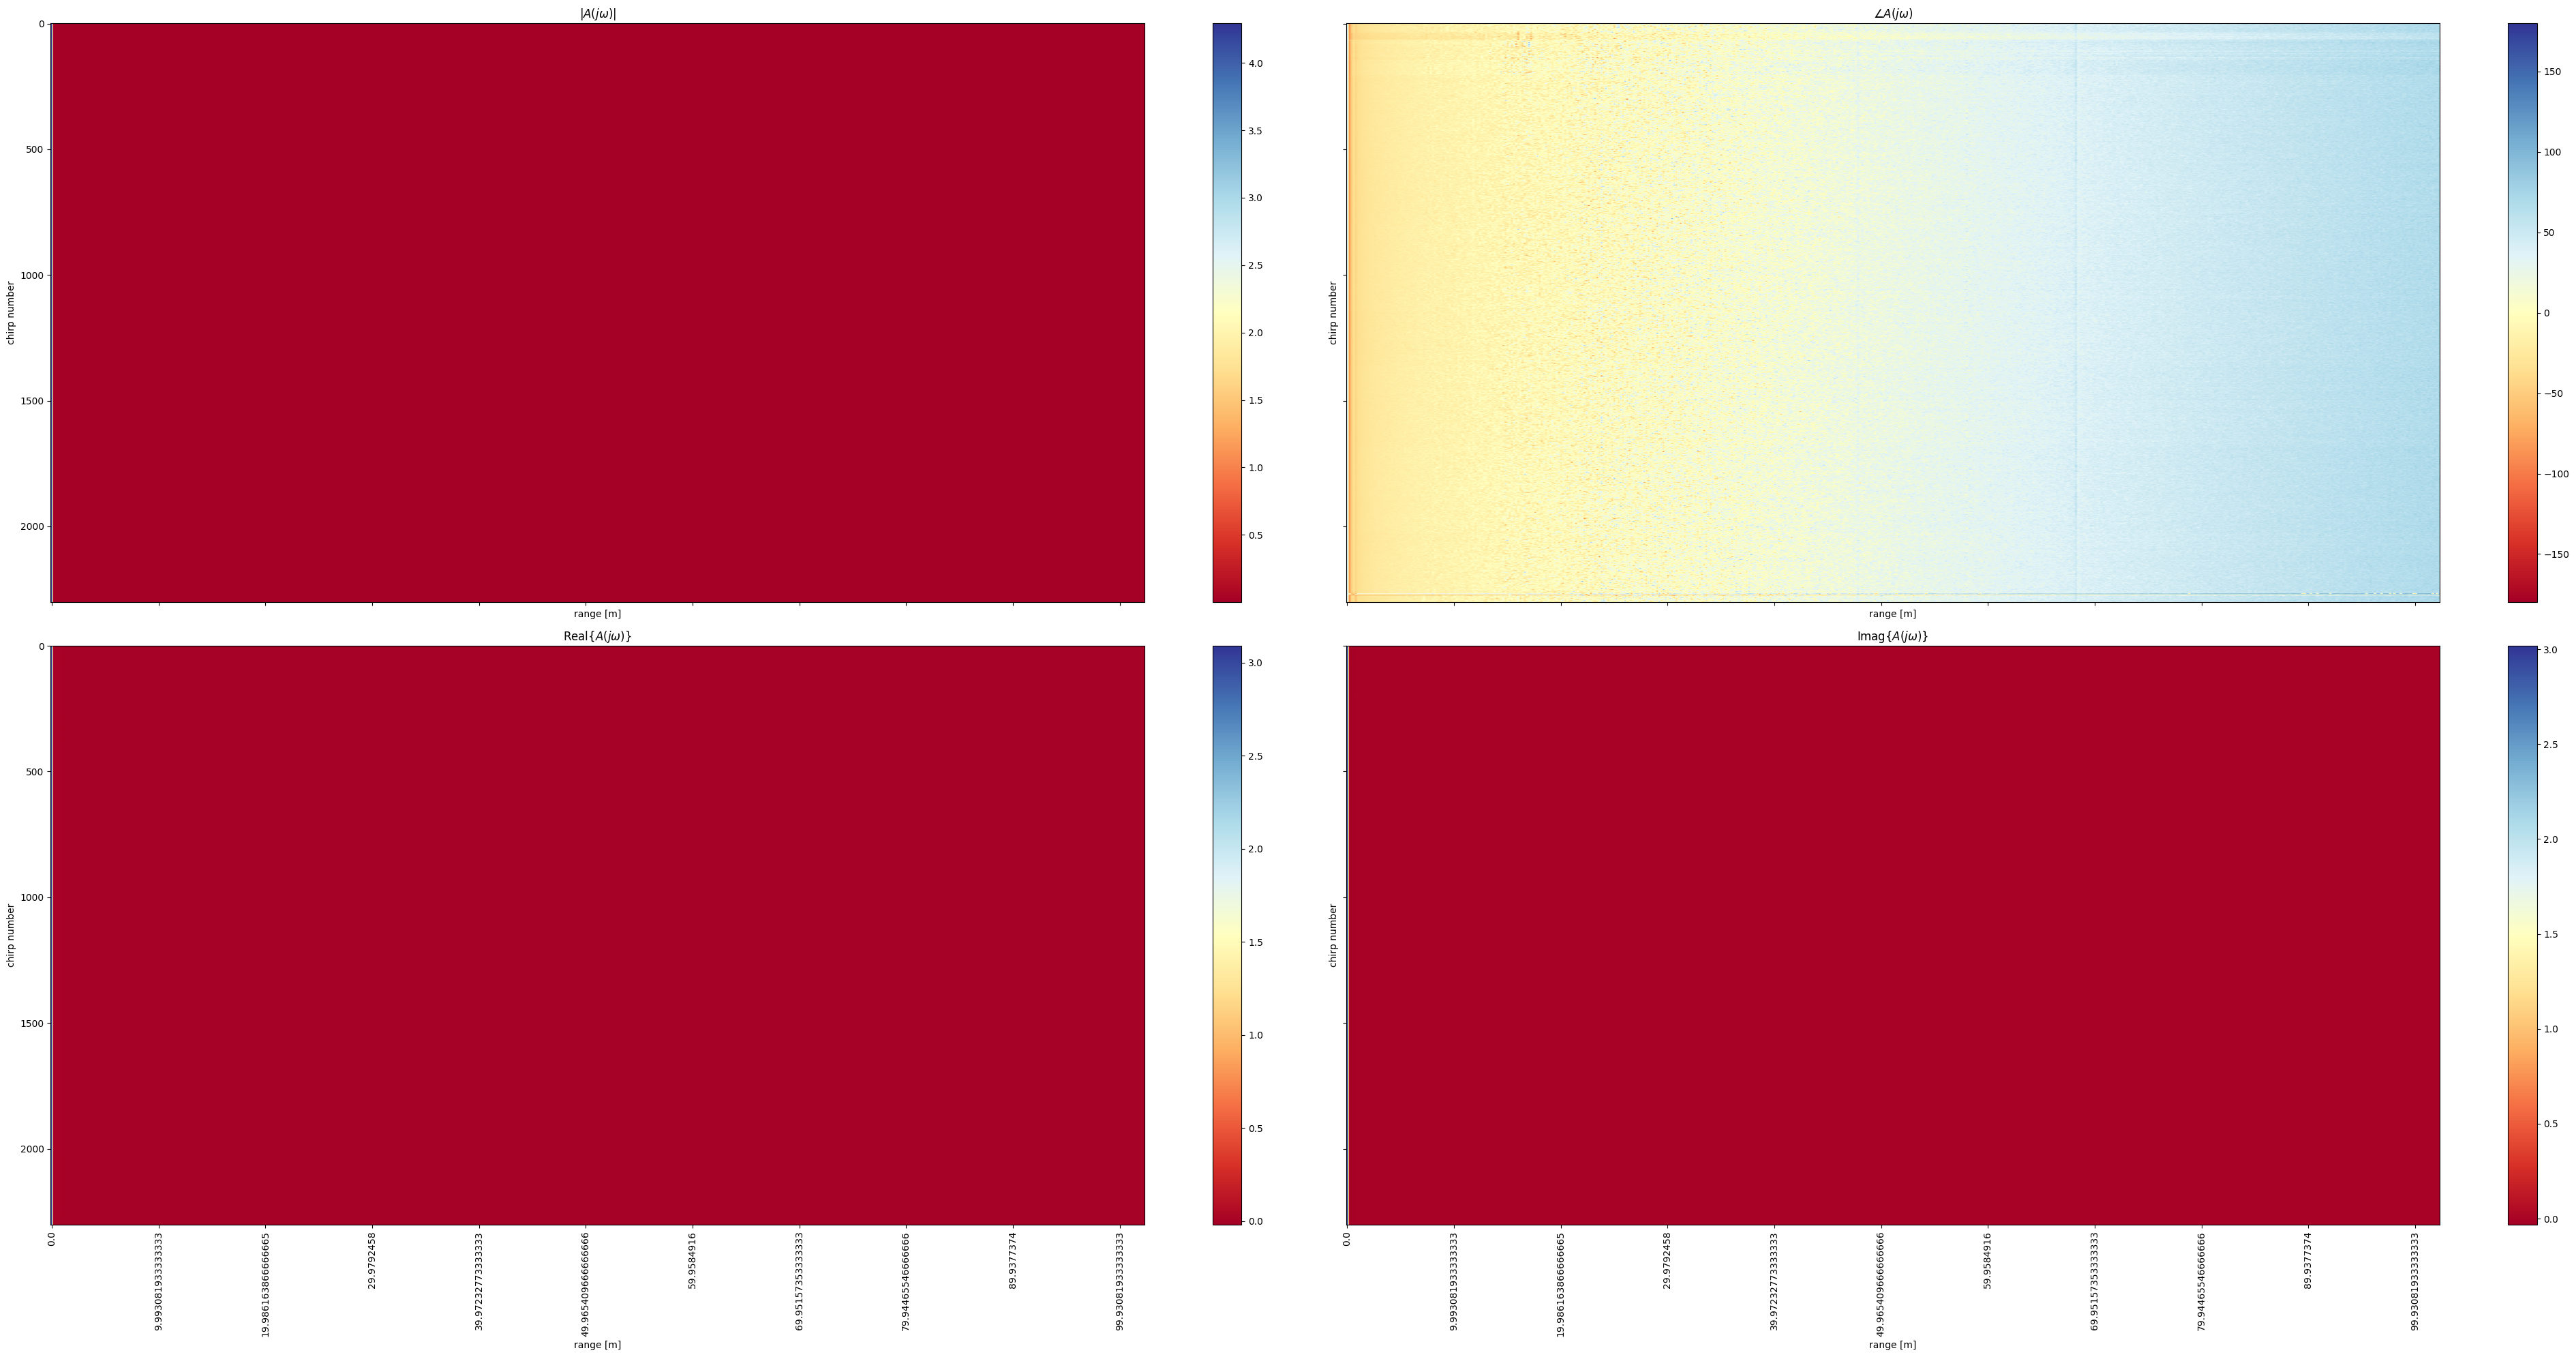

In [13]:
# Adjusting the aspect ratio and improving layout
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(40,20), sharex=True, sharey=True)
abs_axes = ax[0, 0]
phi_axes = ax[0, 1]
real_axes = ax[1, 0]
imag_axes = ax[1, 1]

# Absolute plot
im_asb = abs_axes.imshow(np.abs(range_table), cmap = plt.get_cmap('RdYlBu'), aspect='auto')  # 'auto' ensures the plot scales properly
abs_axes.set_xticks(range(ranges.size)[::50])
abs_axes.set_xticklabels(ranges[::50], rotation=90)
fig.colorbar(im_asb, ax=abs_axes)
abs_axes.set_xlabel("range [m]")
abs_axes.set_ylabel("chirp number")
abs_axes.set_title("$|A(j\omega)|$")

# Phase plot
im_phi = phi_axes.imshow(np.angle(range_table)*360/(2*np.pi), cmap = plt.get_cmap('RdYlBu'), aspect='auto')
fig.colorbar(im_phi, ax=phi_axes)
phi_axes.set_xlabel("range [m]")
phi_axes.set_ylabel("chirp number")
phi_axes.set_title("$∠ A(j\omega)$")
phi_axes.set_xticks(range(ranges.size)[::50])
phi_axes.set_xticklabels(ranges[::50], rotation=90)

# Real plot
im_real = real_axes.imshow(np.real(range_table), cmap = plt.get_cmap('RdYlBu'), aspect='auto')
fig.colorbar(im_real, ax=real_axes)
real_axes.set_xlabel("range [m]")
real_axes.set_ylabel("chirp number")
real_axes.set_title("Real{$A(j\omega)$}")
real_axes.set_xticks(range(ranges.size)[::50])
real_axes.set_xticklabels(ranges[::50], rotation=90)

# Imaginary plot
im_imag = imag_axes.imshow(np.imag(range_table), cmap = plt.get_cmap('RdYlBu'), aspect='auto')
fig.colorbar(im_imag, ax=imag_axes)
imag_axes.set_xlabel("range [m]")
imag_axes.set_ylabel("chirp number")
imag_axes.set_title("Imag{$A(j\omega)$}")
imag_axes.set_xticks(range(ranges.size)[::50])
imag_axes.set_xticklabels(ranges[::50], rotation=90)

# Automatically adjust layout
plt.tight_layout()

### Velocity Estimation

In [14]:
velocity_table = np.zeros((n_r, range_table.shape[1]), dtype=np.csingle)

In [15]:
for r in range(range_table.shape[1]):
    range_bin_magn = range_table[:, r]
    range_bin_fft = fft(range_bin_magn)
    velocity_table[:, r]= 2.0/n_r*range_bin_fft

In [16]:
def angle_freq_to_velocity(w):
    return w*C/(4*np.pi*f_0)

omega_second = 2*np.pi*np.concatenate((np.arange(0, n_r//2), np.arange(-n_r//2, 0)[::-1]))*f_chirp/n_r

In [17]:
velocities = angle_freq_to_velocity(omega_second)

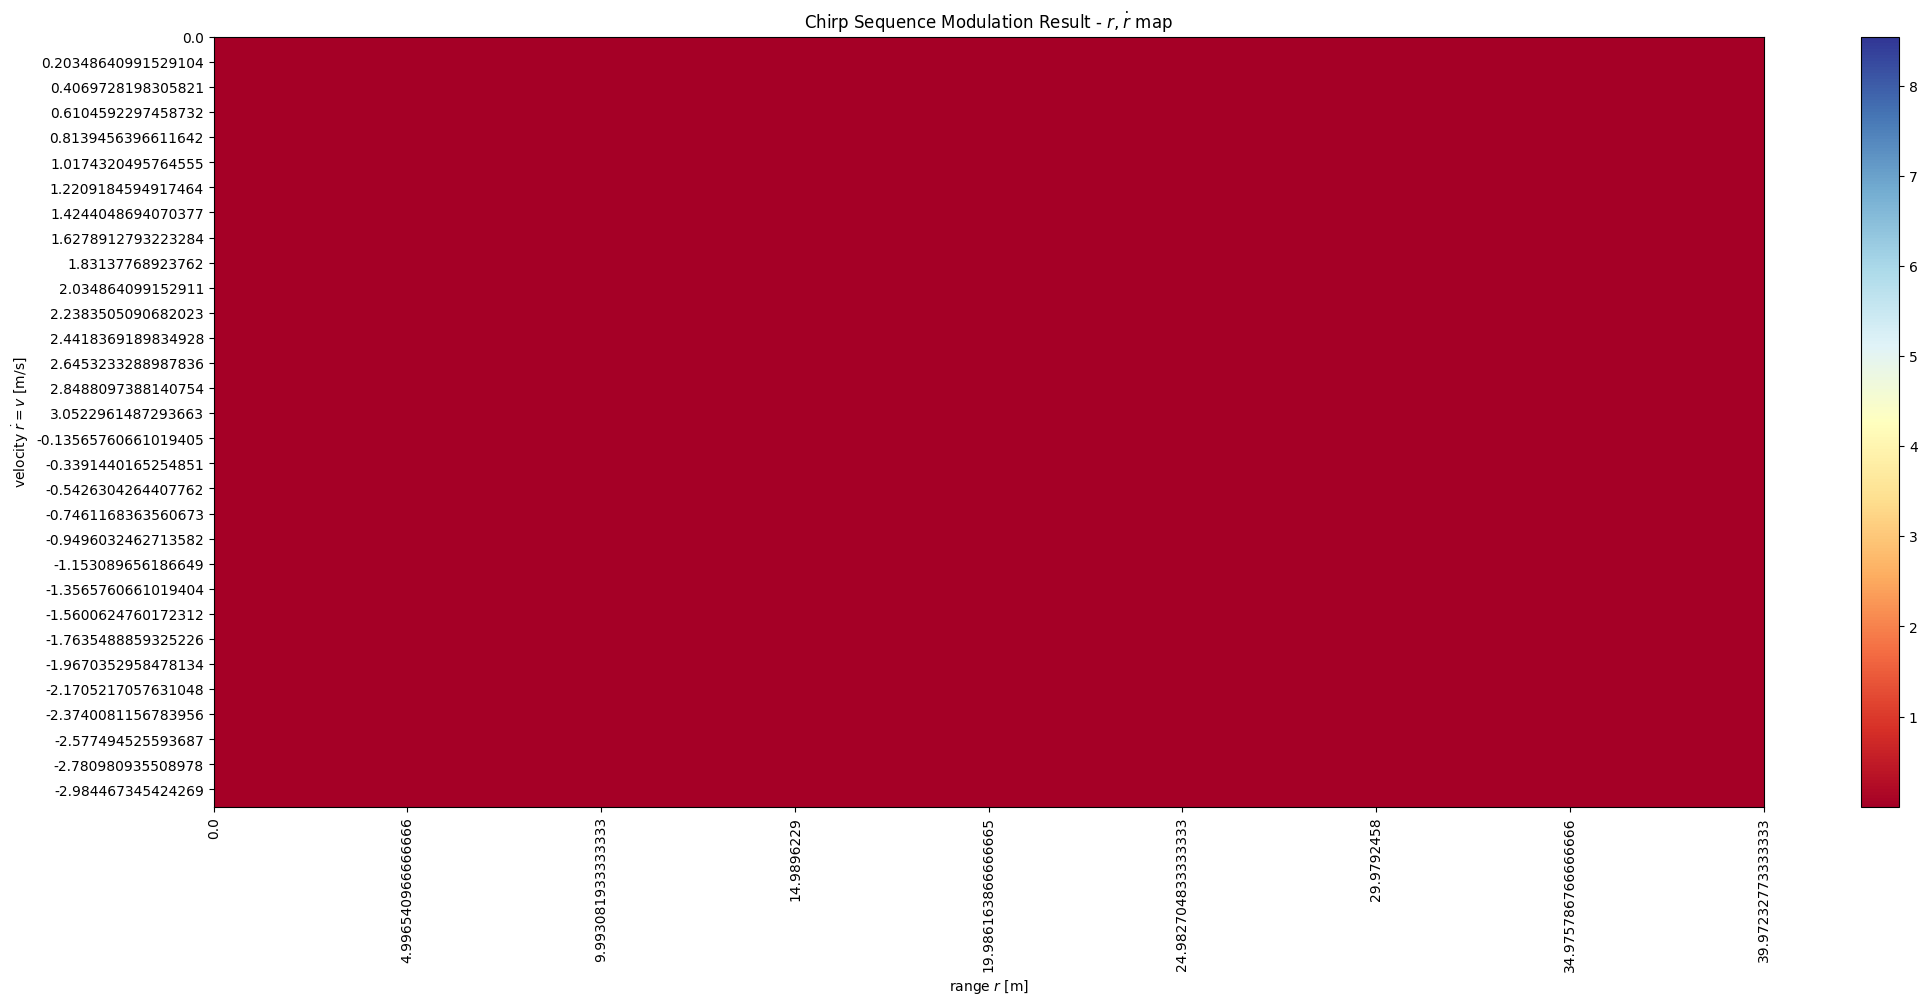

In [18]:
plt.figure(figsize=(25,10))  # Keep the figure size large
plt.imshow(np.abs(velocity_table), cmap = plt.get_cmap('RdYlBu'), aspect='auto')  # Set aspect ratio to 'auto'

# Reduce number of x-axis and y-axis ticks
plt.xticks(range(0, ranges.size, 25), ranges[::25], rotation=90)
plt.yticks(range(0, velocities.size, 75), velocities[::75])

# Set x and y limits
plt.xlim([0, 200])

# Labels and title
plt.xlabel("range $r$ [m]")
plt.ylabel("velocity $\\dot r = v$ [m/s]")
plt.title("Chirp Sequence Modulation Result - $r, \\dot r$ map")

# Colorbar
plt.colorbar()

plt.show()


